# Evaluate classification

In [1]:
import os
import torch

from cnn_framework.utils.data_managers.default_data_manager import DefaultDataManager
from cnn_framework.utils.data_loader_generators.data_loader_generator import (
    DataLoaderGenerator,
)
from cnn_framework.utils.model_managers.cnn_model_manager import CnnModelManager
from cnn_framework.utils.metrics.classification_accuracy import ClassificationAccuracy

from cell_cycle_classification.utils.data_set import FucciClassificationDataSet
from cell_cycle_classification.backbone.fucci_classifier import FucciClassifier

from cell_cycle_classification.utils.model_params import FucciVAEModelParams

### Define parameters

In [2]:
params = FucciVAEModelParams()
params.update()

# Define custom paths
params.data_dir = "C:/Users/thoma/data/Data Oriane April/data_repository/all"
params.models_folder = "C:/Users/thoma/models/cycle_classification/20241101-055937-4998324"
params.model_load_path = os.path.join(params.models_folder, "early_stopping_cycle_classification.pt")

Model time id: 20250107-160747-local
epochs 10 | batch 32 | lr 0.0001 | weight decay 0.05 | dropout 0.0 | c [0] | z [0, 1, 2, 3, 4] | data set size None | latent dim 256 | beta 0.01 | gamma 100.0 | delta 10000.0 | depth 5 | kld loss standard | encoder name resnet18 | latent dim 256 | beta 0.01 | gamma 100.0 | delta 10000.0 | C 50 | depth 5 | kld loss standard | encoder name resnet18


In [3]:
# Next is specific to our data set - modify with your own data set
params.train_file = os.path.join(os.path.abspath(''), "data_set_split", "train.txt")
params.val_file = os.path.join(os.path.abspath(''), "data_set_split", "val.txt")
params.test_file = os.path.join(os.path.abspath(''), "data_set_split", "test.txt")
params.data_set_size = 280  # maximum nucleus diameter 

### Load data

In [4]:
loader_generator = DataLoaderGenerator(
    params, FucciClassificationDataSet, DefaultDataManager
)
_, _, test_dl = loader_generator.generate_data_loader()

File names correctly loaded.
Splitting file names ...
### Data source ###
train data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\train.txt - 100% elements
val data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\val.txt - 100% elements
test data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\test.txt - 100% elements
###################
train has 752 images.
val has 323 images.
test has 388 images.
###################


### Load pretrained model

In [5]:
model = FucciClassifier(params)
model.load_state_dict(torch.load(params.model_load_path))

<All keys matched successfully>

### Evaluate classification

Current commit hash: 0594c3d0d41c72530f718bb218d8558109c44016
Model evaluation in progress: 100.0% | Batch #12                                                   
Average ClassificationAccuracy: 0.823


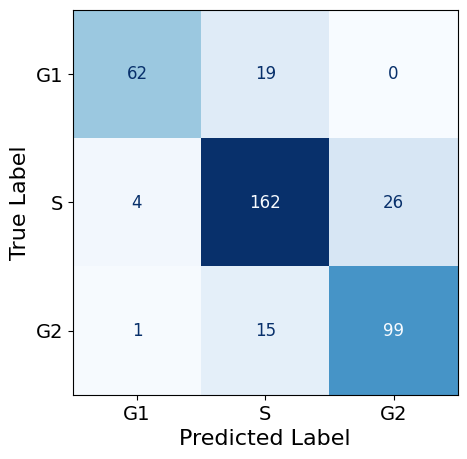

In [6]:
CnnModelManager(model, params, ClassificationAccuracy).predict(test_dl);